<a href="https://colab.research.google.com/github/shrisha337-beep/Library-Slip-Tracker/blob/main/Library_slip_tracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 0: Installing Dependencies

In [18]:
!pip install pandas numpy matplotlib seaborn scikit-learn

Step 1: Installing Libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta, datetime
import random
from sklearn.preprocessing import LabelEncoder, StandardScaler # Corrected import
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier # Corrected import
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Step 2: Generate Synthetic DataSet (500 entries)

In [20]:
#SetUp
import numpy as np # Import numpy
from datetime import timedelta, datetime # Import timedelta and datetime
np.random.seed(42)
student = ['Raghav Singh','Rahul Sharma','Anjali Khanna','Khushi Mukhija','Shreeja Chaturvedi','Megha Jain','Kunal Mehta','Ananya Shroff','Karan Ahuja','Sneha Kapoor',
                 'Rohit Kashyap','Megha Jain','Vivek Agrawal','Isha Khanna','Aman Verma','Priya Desai','Shreya Sharma']
books = ['Introduction to ML','Python Basics','Data Science with Python','Modern Web-Dev','Operating Systems','Linear Algebra','Digital Circutis',
                'Database Systems','Advanced Machine Learning','Artificial Intelligence','Electronic Circuits']
departments = ['CS','Math','Electronics','AI','Web Dev']
librarians = ['Mrs. Batra','Mr. Khurana','Ms. Sheikh','Mrs. Kapoor','Mr. Ahuja']

#Settings
n = 500
fine_per_day = 1
start_date = datetime(2025,1,1)

# Original return_offsets and probabilities
return_offsets = list(range(-5, 15))
probabilities = np.array([0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05])
#Normalize to sum to 1.0
probabilities = probabilities/probabilities.sum()


#Generate Data
data = []
for i in range(n):
    slip_id = f"SLIP{i+1:05d}"
    student = random.choice(student)
    book = random.choice(books)
    department = random.choice(departments)
    librarian = random.choice(librarians)

    issue_date = start_date + timedelta(days=random.randint(0,365))
    due_date = issue_date + timedelta(days=14) # Due date should be relative to issue date
    return_offset = random.choices(return_offsets, weights=probabilities, k=1)[0]
    return_date = due_date + timedelta(days=int(return_offset)) # Calculate return_date relative to due_date


    delay_days = max(0,(return_date - due_date).days)
    fine_amount = delay_days * fine_per_day

    data.append([slip_id, student, book, department, librarian, issue_date, due_date, return_date, delay_days, fine_amount])

# Create and Save Dataframe
columns = ['Slip_Id','Student','Book','Department','Librarian','Issue_Date','Due_Date','Return_Date','Delay_Days','Fine']
df = pd.DataFrame(data,columns=columns)
df.to_csv('library_slip_tracker.csv',index=False)
print("Synthetic dataset generated and saved as 'library_slip_tracker.csv")

Synthetic dataset generated and saved as 'library_slip_tracker.csv


Step 3: Loading DataSet (either uploaded by user or use the generated one)

In [21]:
from google.colab import files
import io
import pandas as pd

print("Please upload your own dataset or press cancel to use generated one")
uploaded = files.upload()
if uploaded:
  for filename in uploaded.keys():
    df = pd.read_csv(io.BytesIO(uploaded[filename]))
else:
  print("No file uploaded, using generated DataSet:")
  # Read the generated CSV directly from the file system
  df = pd.read_csv('library_slip_tracker.csv')

Please upload your own dataset or press cancel to use generated one


No file uploaded, using generated DataSet:


Step 4: EDA (Exploratory Data Analysis)

Shape of the data: (500, 10)

First 5 rows:
      Slip_Id     Student                      Book Department   Librarian  \
0  SLIP00001  Aman Verma   Artificial Intelligence    Web Dev  Ms. Sheikh   
1  SLIP00002           r  Data Science with Python    Web Dev  Ms. Sheikh   
2  SLIP00003           r             Python Basics         AI   Mr. Ahuja   
3  SLIP00004           r  Data Science with Python    Web Dev  Mrs. Batra   
4  SLIP00005           r  Data Science with Python         CS  Ms. Sheikh   

   Issue_Date    Due_Date Return_Date  Delay_Days  Fine  
0  2025-12-05  2025-12-19  2025-12-25           6     6  
1  2025-01-29  2025-02-12  2025-02-14           2     2  
2  2025-09-29  2025-10-13  2025-10-19           6     6  
3  2025-02-28  2025-03-14  2025-03-13           0     0  
4  2025-10-15  2025-10-29  2025-10-27           0     0  

Data Types:
 Slip_Id        object
Student        object
Book           object
Department     object
Librarian      object
Issue_Date     objec

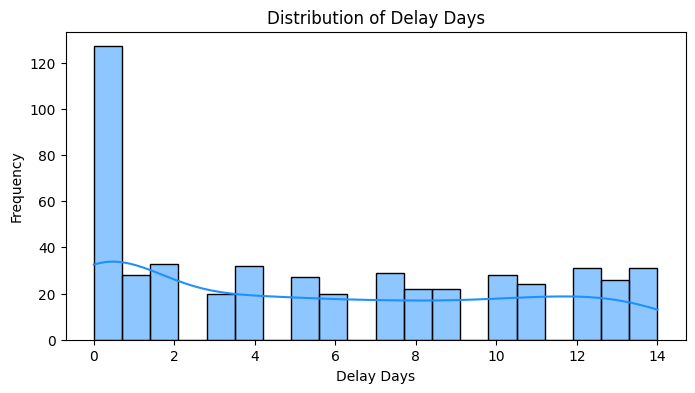

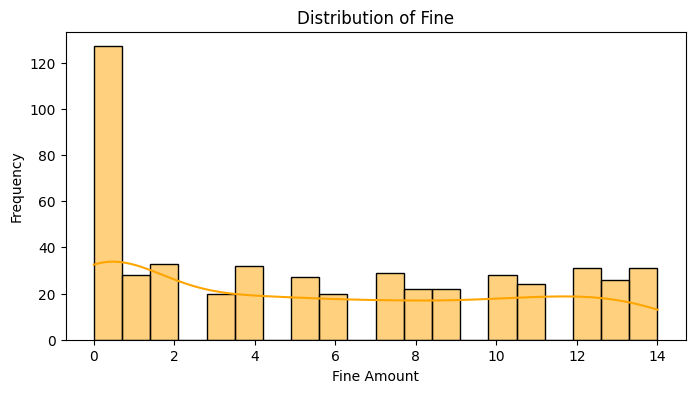

/tmp/ipython-input-4091869484.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=delayed_books.values, y=delayed_books.index, palette='mako')


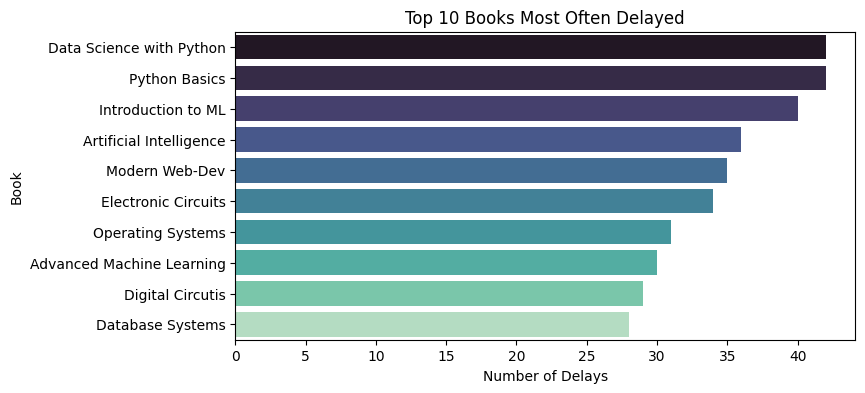

/tmp/ipython-input-4091869484.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Department', y='Delay_Days', data=df, palette='Set3')


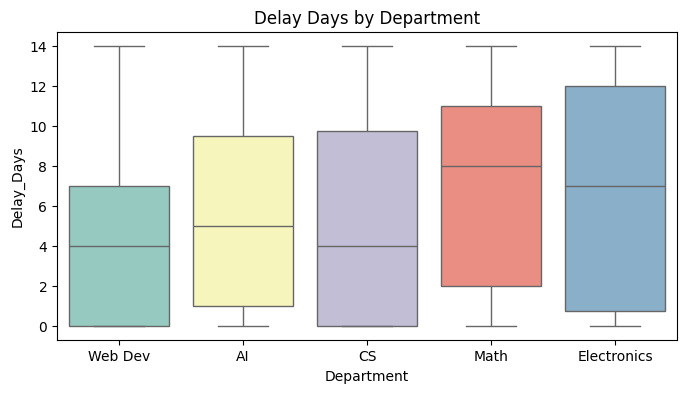

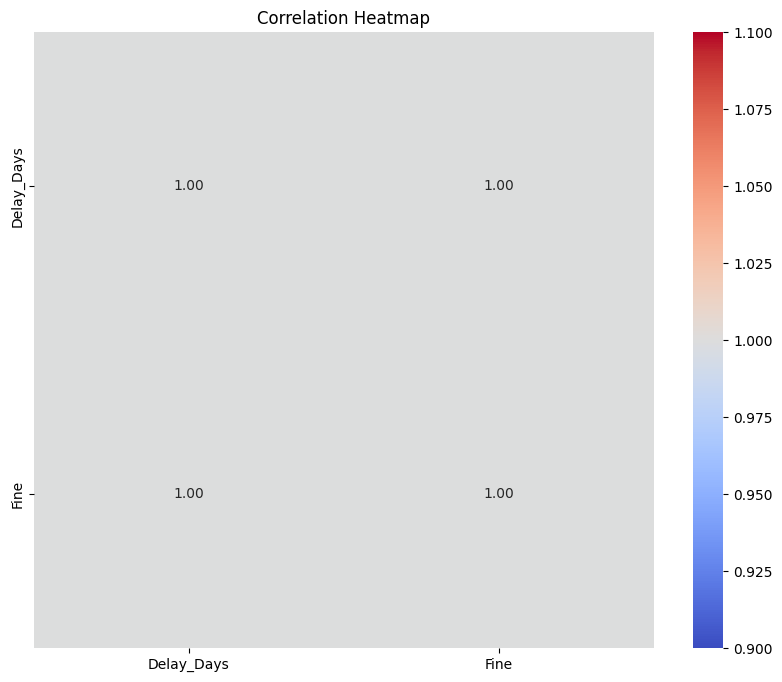

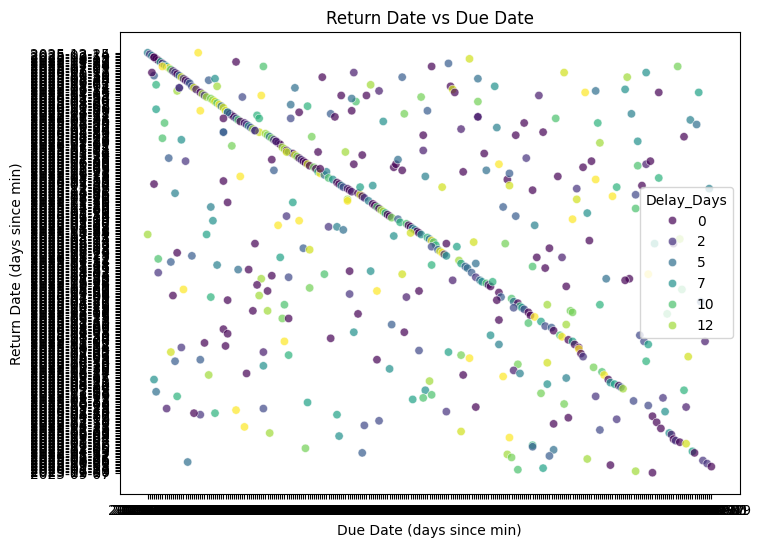

/tmp/ipython-input-4091869484.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Librarian', y='Delay_Days', data=df, estimator='mean', palette='pastel')


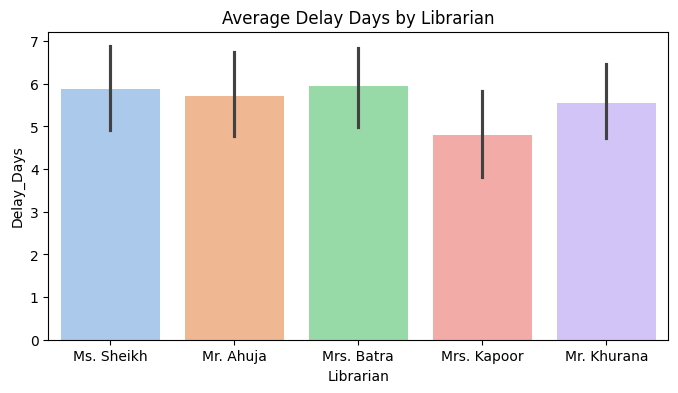


EDA completed. Insights can be used to inform feature engineering and modeling.


In [22]:
# 1. Basic Information
print("Shape of the data:", df.shape)
print("\nFirst 5 rows:\n", df.head())
print("\nData Types:\n", df.dtypes)
print("\nMissing Values per Column:\n", df.isnull().sum())
print("\nSummary Statistics:\n", df.describe(include='all'))

# 2. Value Counts for Categorical Columns
categorical_cols = ['Student', 'Book', 'Department', 'Librarian']
for col in categorical_cols:
    print(f"\nValue counts for {col}:\n", df[col].value_counts())

# 3. Distribution of Delay_Days
plt.figure(figsize=(8,4))
sns.histplot(df['Delay_Days'], bins=20, kde=True, color='dodgerblue')
plt.title('Distribution of Delay Days')
plt.xlabel('Delay Days')
plt.ylabel('Frequency')
plt.show()

# 4. Distribution of Fine
plt.figure(figsize=(8,4))
sns.histplot(df['Fine'], bins=20, kde=True, color='orange')
plt.title('Distribution of Fine')
plt.xlabel('Fine Amount')
plt.ylabel('Frequency')
plt.show()

# 5. Books Most Often Delayed
delayed_books = df[df['Delay_Days']>0]['Book'].value_counts().head(10)
plt.figure(figsize=(8,4))
sns.barplot(x=delayed_books.values, y=delayed_books.index, palette='mako')
plt.title('Top 10 Books Most Often Delayed')
plt.xlabel('Number of Delays')
plt.ylabel('Book')
plt.show()

# 6. Delay by Department
plt.figure(figsize=(8,4))
sns.boxplot(x='Department', y='Delay_Days', data=df, palette='Set3')
plt.title('Delay Days by Department')
plt.show()

# 7. Correlation Heatmap (numerical features)
plt.figure(figsize=(10,8))
numerical_cols = df.select_dtypes(include=['number']).columns
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# 8. Return Date vs Due Date (scatter plot)
plt.figure(figsize=(8,6))
sns.scatterplot(x='Due_Date', y='Return_Date', data=df, hue='Delay_Days', palette='viridis', alpha=0.7)
plt.title('Return Date vs Due Date')
plt.xlabel('Due Date (days since min)')
plt.ylabel('Return Date (days since min)')
plt.show()

# 9. Delays by Librarian
plt.figure(figsize=(8,4))
sns.barplot(x='Librarian', y='Delay_Days', data=df, estimator='mean', palette='pastel')
plt.title('Average Delay Days by Librarian')
plt.show()

# 10. Delays over Time (if Issue_Date is available as datetime)
if 'Issue_Date' in df.columns and (df['Issue_Date'].dtype == 'int64' or df['Issue_Date'].dtype == 'float64'):
    plt.figure(figsize=(10,4))
    sns.lineplot(x='Issue_Date', y='Delay_Days', data=df, estimator='mean')
    plt.title('Average Delay Days Over Issue Time')
    plt.xlabel('Issue Date (days since min)')
    plt.ylabel('Avg Delay Days')
    plt.show()

print("\nEDA completed. Insights can be used to inform feature engineering and modeling.")

Step 4: Preprocessing the Data

In [23]:
print("\n Data Preprocessing")

#Encode categorical columns
label_encoders = {}
categorical_cols = ['Student','Book','Department','Librarian']
for col in categorical_cols:
  label_encoders[col] = LabelEncoder()
  df[col] = label_encoders[col].fit_transform(df[col])

#Convert dates to numeric (days since earliest date)
date_cols = ['Issue_Date','Due_Date','Return_Date']
for col in date_cols:
  df[col] = pd.to_datetime(df[col])
  df[col] = (df[col] - df[col].min()).dt.days

#Feature and Target
X = df.drop(columns=['Slip_Id','Fine']) #Drop slip ID and fine from features
Y = (df['Delay_Days']>0).astype(int) #Target: 1 if returned late, otherwise 0

#Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


 Data Preprocessing


Step 5: Train-Test Split

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled,Y,test_size=0.4,random_state=42)
print(X_train)
print(Y_train)
print(X_test)
print(Y_test)

[[ 0.04476615 -0.63299562 -0.04276212 ...  1.25021476  1.22872823
  -0.53617052]
 [ 0.04476615 -0.31963145 -0.04276212 ... -1.37362843 -1.41551377
  -1.15387849]
 [ 0.04476615 -0.94635978 -1.42218532 ... -0.07101125  0.01330471
   1.72875871]
 ...
 [ 0.04476615 -0.94635978  0.64694948 ... -0.48040522 -0.47843152
  -0.12436521]
 [ 0.04476615  1.24718939  1.33666108 ... -1.13171381 -1.10933838
   0.28744011]
 [ 0.04476615  0.93382522  0.64694948 ...  1.23160594  1.23800627
   0.08153745]]
467    1
83     0
245    1
165    1
163    1
      ..
106    1
270    0
348    1
435    1
102    1
Name: Delay_Days, Length: 300, dtype: int64
[[ 0.04476615  1.56055355 -0.04276212 ...  0.12438133  0.17103143
   0.90514808]
 [ 0.04476615 -0.94635978  1.33666108 ...  1.58517346  1.58129383
  -0.12436521]
 [ 0.04476615  1.56055355 -0.73247372 ... -1.46667252 -1.41551377
   0.90514808]
 ...
 [ 0.04476615 -0.94635978 -1.42218532 ... -0.38736113 -0.37637306
   0.08153745]
 [ 0.04476615 -1.57308812 -0.7324737

Step 6: Model Training


Random Forest Classifier Confusion Matrix:
Random Forest Classifier Accuracy: 1.0
[[ 49   0]
 [  0 151]]

Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00       151

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



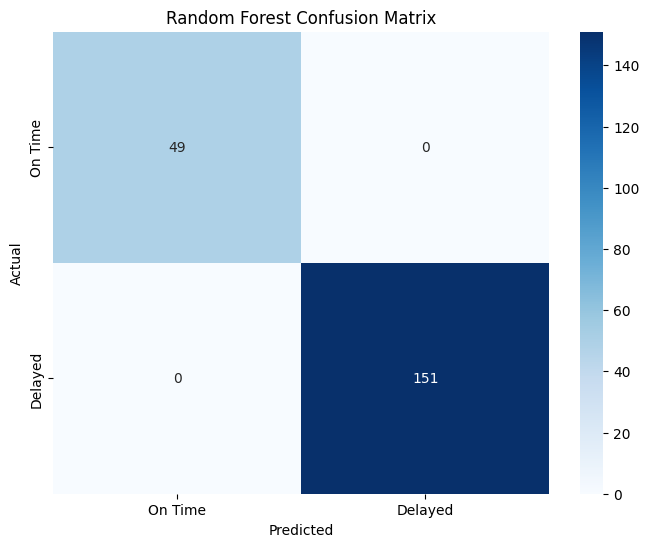


Logistic Regression Results:
Accuracy: 0.965
Confusion Matrix:
 [[ 49   0]
 [  7 144]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93        49
           1       1.00      0.95      0.98       151

    accuracy                           0.96       200
   macro avg       0.94      0.98      0.95       200
weighted avg       0.97      0.96      0.97       200



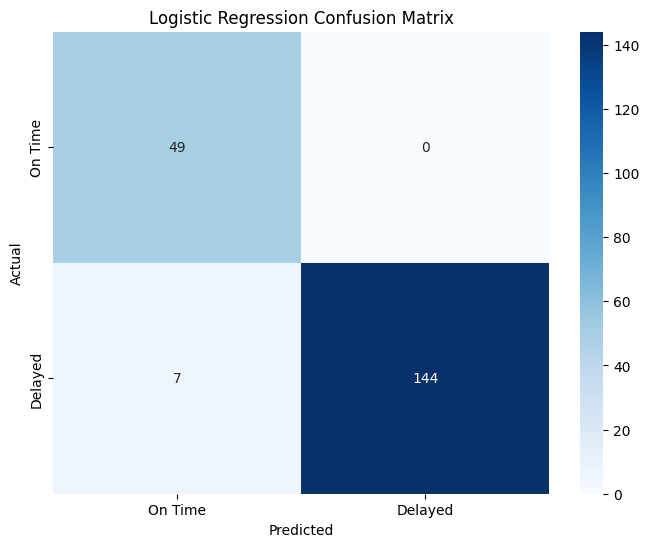


Decision Tree Classifier Results:
Accuracy: 1.0
Confusion Matrix:
 [[ 49   0]
 [  0 151]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00       151

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



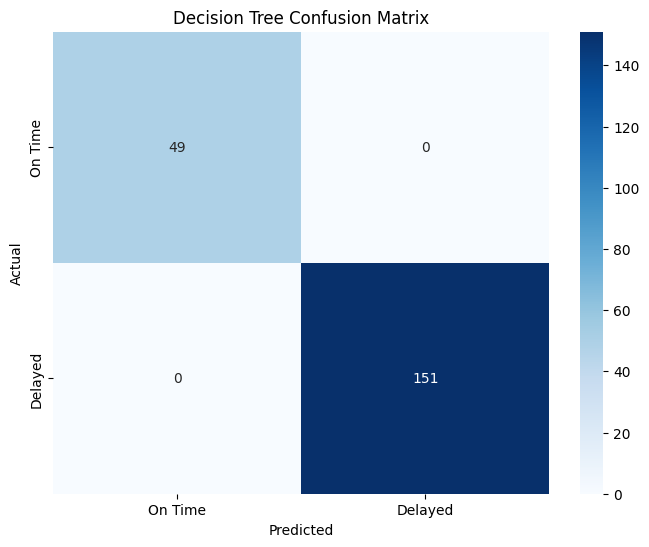


Support Vector Machine (SVM) Results:
Accuracy: 0.91
Confusion Matrix:
 [[ 49   0]
 [ 18 133]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      1.00      0.84        49
           1       1.00      0.88      0.94       151

    accuracy                           0.91       200
   macro avg       0.87      0.94      0.89       200
weighted avg       0.93      0.91      0.91       200



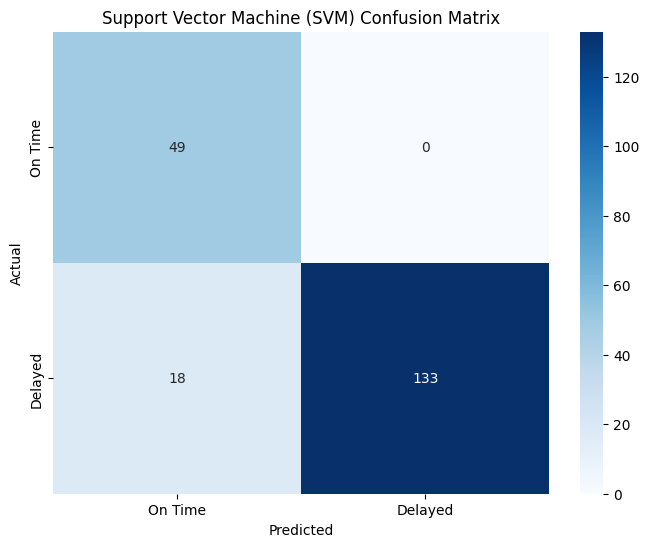

Random Forest Classifier Accuracy: 100.0 %
Random Forest Classifier Accuracy (rounded): 100.0 %
Raw accuracy (fraction): 1.0
Logistic Regression Accuracy: 96.50%
Decision Tree Classifier Accuracy: 100.00%
Support Vector Machine (SVM) Accuracy: 91.00%


In [25]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)
y_pred_rf = rf_model.predict(X_test)
print("\nRandom Forest Classifier Confusion Matrix:")
print("Random Forest Classifier Accuracy:", accuracy_score(Y_test, y_pred_rf))
cm_rf = confusion_matrix(Y_test, y_pred_rf)
print(cm_rf)
print("\nRandom Forest Classifier Classification Report:")
print(classification_report(Y_test, y_pred_rf))

# Plot Confusion Matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['On Time', 'Delayed'],
            yticklabels=['On Time', 'Delayed'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Logistic Regression
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train, Y_train)
y_pred_logreg = logreg.predict(X_test)
print("\nLogistic Regression Results:")
print("Accuracy:", accuracy_score(Y_test, y_pred_logreg))
cm_logreg = confusion_matrix(Y_test, y_pred_logreg)
print("Confusion Matrix:\n", cm_logreg)
print("Classification Report:\n", classification_report(Y_test, y_pred_logreg))

# Plot Confusion Matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', xticklabels=['On Time', 'Delayed'],
            yticklabels=['On Time', 'Delayed'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.show()


# Decision Tree Classifier
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, Y_train)
y_pred_tree = tree.predict(X_test)
print("\nDecision Tree Classifier Results:")
print("Accuracy:", accuracy_score(Y_test, y_pred_tree))
cm_tree = confusion_matrix(Y_test, y_pred_tree)
print("Confusion Matrix:\n", cm_tree)
print("Classification Report:\n", classification_report(Y_test, y_pred_tree))

# Plot Confusion Matrix for Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Blues', xticklabels=['On Time', 'Delayed'],
            yticklabels=['On Time', 'Delayed'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree Confusion Matrix")
plt.show()


# Support Vector Machine (SVM)
svm = SVC(random_state=42)
svm.fit(X_train, Y_train)
y_pred_svm = svm.predict(X_test)
print("\nSupport Vector Machine (SVM) Results:")
print("Accuracy:", accuracy_score(Y_test, y_pred_svm))
cm_svm = confusion_matrix(Y_test, y_pred_svm)
print("Confusion Matrix:\n", cm_svm)
print("Classification Report:\n", classification_report(Y_test, y_pred_svm))

# Plot Confusion Matrix for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['On Time', 'Delayed'],
            yticklabels=['On Time', 'Delayed'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Support Vector Machine (SVM) Confusion Matrix")
plt.show()


# Accuracy for RandomForestClassifier (already trained as 'model')
y_pred_rf = rf_model.predict(X_test)
acc_rf = accuracy_score(Y_test, y_pred_rf) * 100

# Accuracy for Logistic Regression
acc_logreg = accuracy_score(Y_test, y_pred_logreg) * 100

# Accuracy for Decision Tree Classifier
acc_tree = accuracy_score(Y_test, y_pred_tree) * 100

# Accuracy for SVM
acc_svm = accuracy_score(Y_test, y_pred_svm) * 100

print("Random Forest Classifier Accuracy:", acc_rf, "%")
print("Random Forest Classifier Accuracy (rounded):", round(acc_rf, 2), "%")
print("Raw accuracy (fraction):", accuracy_score(Y_test, y_pred_rf))
print(f"Logistic Regression Accuracy: {acc_logreg:.2f}%")
print(f"Decision Tree Classifier Accuracy: {acc_tree:.2f}%")
print(f"Support Vector Machine (SVM) Accuracy: {acc_svm:.2f}%")

Step 7: Predictions and Evaluation


Accuracy: 1.0

Confusion Matrix:


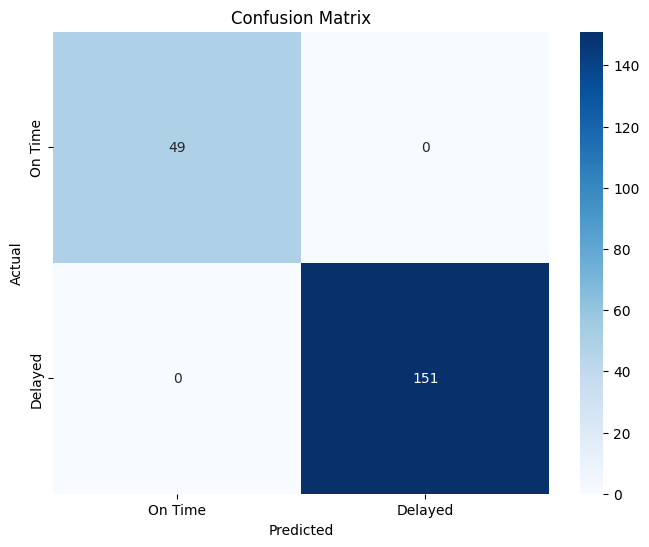


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00       151

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [26]:
y_pred = rf_model.predict(X_test) # Changed 'model' to 'rf_model'
accuracy = accuracy_score(Y_test,y_pred)
conf_matrix = confusion_matrix(Y_test,y_pred)
class_report = classification_report(Y_test,y_pred)

print(f"\nAccuracy: {accuracy}")
print("\nConfusion Matrix:")

#Confusion Matrix
cm = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['On Time', 'Delayed'],
            yticklabels=['On Time', 'Delayed']) # Corrected ytickables to yticklabels
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("\nClassification Report:")
print(class_report)

Step 8: Heatmap of Feature Correlations

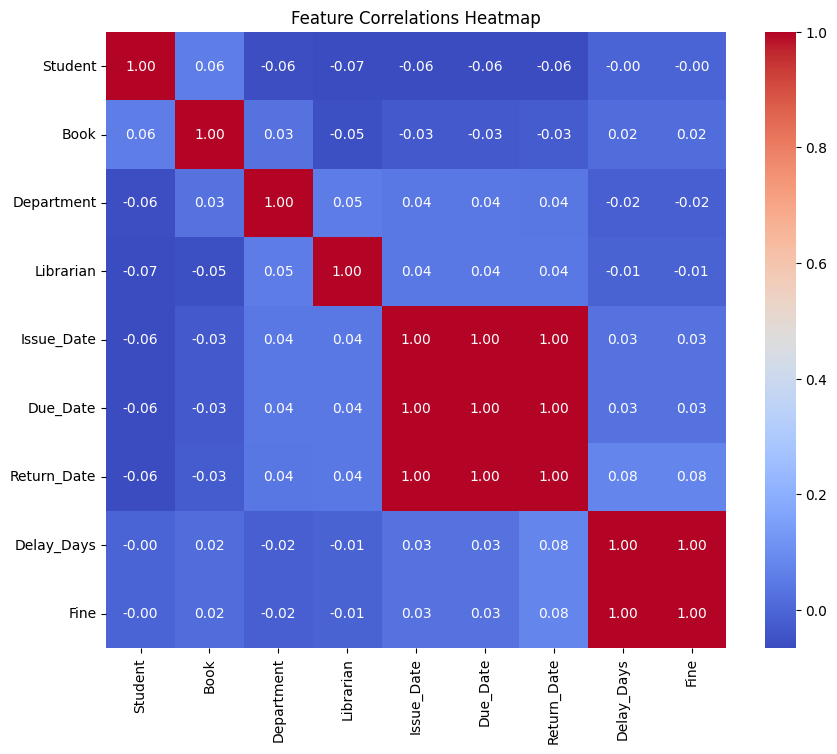

In [27]:
plt.figure(figsize=(10,8))
sns.heatmap(df.drop(columns=['Slip_Id']).corr(),annot=True,cmap='coolwarm',fmt=".2f")
plt.title("Feature Correlations Heatmap")
plt.show()

Step 9: Feature Importance


/tmp/ipython-input-1324081060.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance',y='Feature',data=feat_df, palette='viridis')


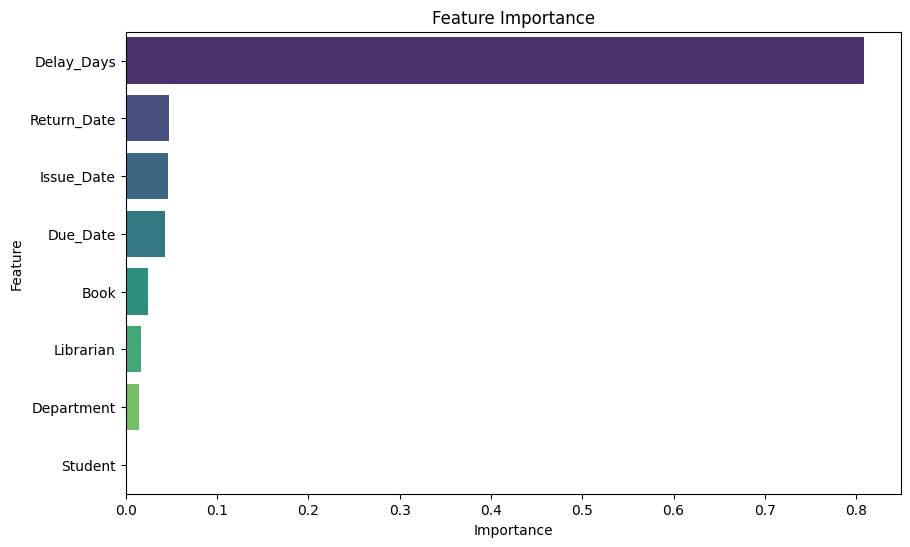

In [29]:
importances = rf_model.feature_importances_ # Changed 'model' to 'rf_model'
feature_names = X.columns

feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance',y='Feature',data=feat_df, palette='viridis')
plt.title("Feature Importance")
plt.show()

Step 3: Loading DataSet (either uploaded by user or use the generated one)

In [30]:
from google.colab import files
import io
import pandas as pd

print("Please upload your own dataset or press cancel to use generated one")
uploaded = files.upload()
if uploaded:
  for filename in uploaded.keys():
    df = pd.read_csv(io.BytesIO(uploaded[filename]))
else:
  print("No file uploaded, using generated DataSet:")
  # Read the generated CSV directly from the file system
  df = pd.read_csv('library_slip_tracker.csv')

display(df.head())

Please upload your own dataset or press cancel to use generated one


No file uploaded, using generated DataSet:


,Slip_Id,Student,Book,Department,Librarian,Issue_Date,Due_Date,Return_Date,Delay_Days,Fine
0,SLIP00001,Aman Verma,Artificial Intelligence,Web Dev,Ms. Sheikh,2025-12-05,2025-12-19,2025-12-25,6,6
1,SLIP00002,r,Data Science with Python,Web Dev,Ms. Sheikh,2025-01-29,2025-02-12,2025-02-14,2,2
2,SLIP00003,r,Python Basics,AI,Mr. Ahuja,2025-09-29,2025-10-13,2025-10-19,6,6
3,SLIP00004,r,Data Science with Python,Web Dev,Mrs. Batra,2025-02-28,2025-03-14,2025-03-13,0,0
4,SLIP00005,r,Data Science with Python,CS,Ms. Sheikh,2025-10-15,2025-10-29,2025-10-27,0,0


Step 4: Preprocessing the Data

In [31]:
print("\n Data Preprocessing")

#Encode categorical columns
label_encoders = {}
categorical_cols = ['Student','Book','Department','Librarian']
for col in categorical_cols:
  label_encoders[col] = LabelEncoder()
  df[col] = label_encoders[col].fit_transform(df[col])

#Convert dates to numeric (days since earliest date)
date_cols = ['Issue_Date','Due_Date','Return_Date']
for col in date_cols:
  df[col] = pd.to_datetime(df[col])
  df[col] = (df[col] - df[col].min()).dt.days

#Feature and Target
X = df.drop(columns=['Slip_Id','Fine']) #Drop slip ID and fine from features
Y = (df['Delay_Days']>0).astype(int) #Target: 1 if returned late, otherwise 0

#Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

display(X_scaled)
display(Y)


 Data Preprocessing


array([[-22.3383079 ,  -1.25972395,   1.33666108, ...,   1.44560734,
          1.45140124,   0.08153745],
       [  0.04476615,  -0.94635978,   1.33666108, ...,  -1.43875929,
         -1.46190398,  -0.74207318],
       [  0.04476615,   1.56055355,  -1.42218532, ...,   0.82221197,
          0.82977242,   0.08153745],
       ...,
       [  0.04476615,   1.56055355,  -0.73247372, ...,  -0.93632123,
         -0.89594341,   0.69924543],
       [  0.04476615,  -1.25972395,  -1.42218532, ...,   0.48725326,
          0.44009465,  -1.15387849],
       [  0.04476615,   1.24718939,  -1.42218532, ...,   0.12438133,
          0.16175339,   0.69924543]])

,Delay_Days
0,1
1,1
2,1
3,0
4,0
...,...
495,1
496,1
497,1
498,0


Step 5: Train-Test Split

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled,Y,test_size=0.2,random_state=42)
print(X_train)
print(Y_train)
print(X_test)
print(Y_test)

[[ 0.04476615 -0.94635978 -0.73247372 ...  1.1850839   1.14522585
  -0.94797584]
 [ 0.04476615 -0.00626728  0.64694948 ... -1.53180338 -1.50829419
   0.28744011]
 [ 0.04476615 -0.94635978  0.64694948 ...  0.84082079  0.81121633
  -0.74207318]
 ...
 [ 0.04476615 -0.94635978  0.64694948 ... -0.48040522 -0.47843152
  -0.12436521]
 [ 0.04476615  1.24718939  1.33666108 ... -1.13171381 -1.10933838
   0.28744011]
 [ 0.04476615  0.93382522  0.64694948 ...  1.23160594  1.23800627
   0.08153745]]
249    1
433    1
19     1
322    1
332    1
      ..
106    1
270    0
348    1
435    1
102    1
Name: Delay_Days, Length: 400, dtype: int64
[[ 4.47661481e-02  1.56055355e+00 -4.27621191e-02  2.93928282e-03
   1.24381333e-01  1.24381333e-01  1.71031428e-01  9.05148084e-01]
 [ 4.47661481e-02 -9.46359785e-01  1.33666108e+00 -1.46670213e+00
   1.58517346e+00  1.58517346e+00  1.58129383e+00 -1.24365205e-01]
 [ 4.47661481e-02  1.56055355e+00 -7.32473717e-01  2.93928282e-03
  -1.46667252e+00 -1.46667252e+00

Step 6: Model Training


Random Forest Classifier Confusion Matrix:
Random Forest Classifier Accuracy: 1.0
[[29  0]
 [ 0 71]]

Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        71

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



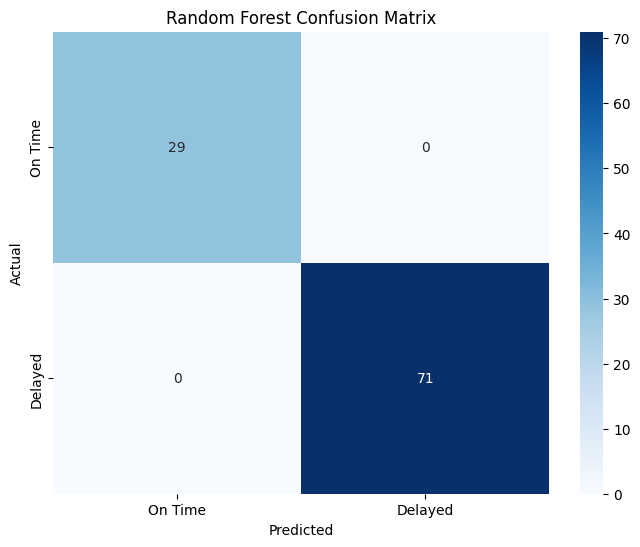


Logistic Regression Results:
Accuracy: 0.99
Confusion Matrix:
 [[29  0]
 [ 1 70]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        29
           1       1.00      0.99      0.99        71

    accuracy                           0.99       100
   macro avg       0.98      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



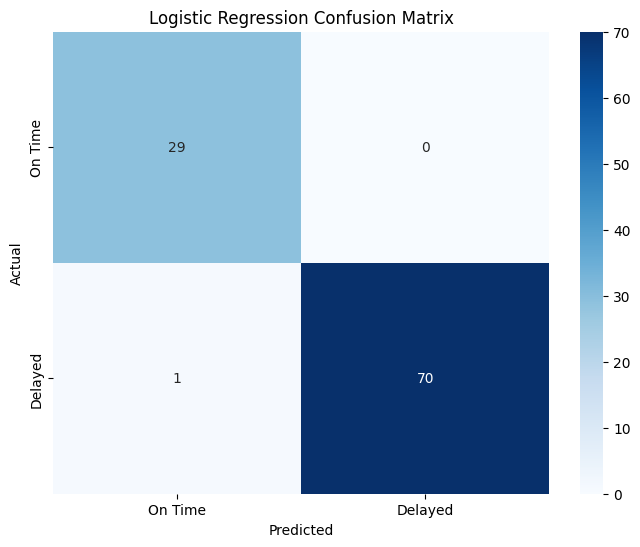


Decision Tree Classifier Results:
Accuracy: 1.0
Confusion Matrix:
 [[29  0]
 [ 0 71]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        71

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



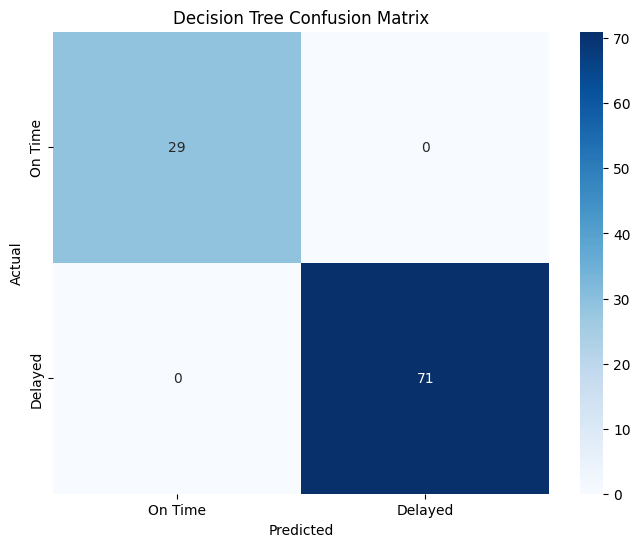


Support Vector Machine (SVM) Results:
Accuracy: 0.95
Confusion Matrix:
 [[29  0]
 [ 5 66]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92        29
           1       1.00      0.93      0.96        71

    accuracy                           0.95       100
   macro avg       0.93      0.96      0.94       100
weighted avg       0.96      0.95      0.95       100



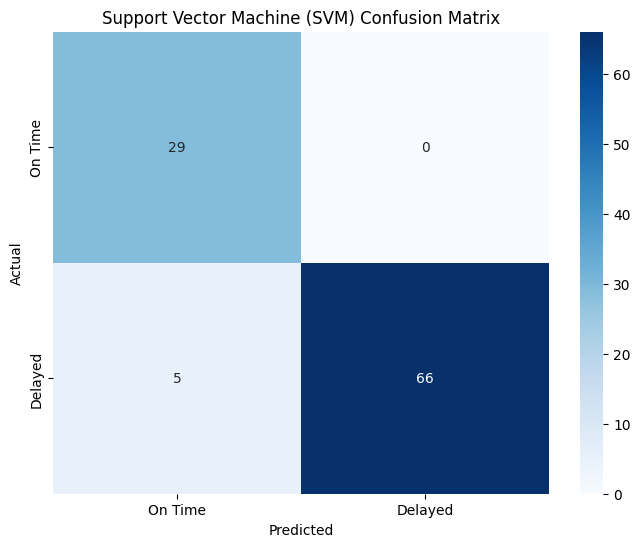

Random Forest Classifier Accuracy: 100.0 %
Random Forest Classifier Accuracy (rounded): 100.0 %
Raw accuracy (fraction): 1.0
Logistic Regression Accuracy: 99.00%
Decision Tree Classifier Accuracy: 100.00%
Support Vector Machine (SVM) Accuracy: 95.00%


In [40]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)
y_pred_rf = rf_model.predict(X_test)
print("\nRandom Forest Classifier Confusion Matrix:")
print("Random Forest Classifier Accuracy:", accuracy_score(Y_test, y_pred_rf))
cm_rf = confusion_matrix(Y_test, y_pred_rf)
print(cm_rf)
print("\nRandom Forest Classifier Classification Report:")
print(classification_report(Y_test, y_pred_rf))

# Plot Confusion Matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['On Time', 'Delayed'],
            yticklabels=['On Time', 'Delayed'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Logistic Regression
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train, Y_train)
y_pred_logreg = logreg.predict(X_test)
print("\nLogistic Regression Results:")
print("Accuracy:", accuracy_score(Y_test, y_pred_logreg))
cm_logreg = confusion_matrix(Y_test, y_pred_logreg)
print("Confusion Matrix:\n", cm_logreg)
print("Classification Report:\n", classification_report(Y_test, y_pred_logreg))

# Plot Confusion Matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', xticklabels=['On Time', 'Delayed'],
            yticklabels=['On Time', 'Delayed'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.show()


# Decision Tree Classifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, Y_train)
y_pred_tree = tree.predict(X_test)
print("\nDecision Tree Classifier Results:")
print("Accuracy:", accuracy_score(Y_test, y_pred_tree))
cm_tree = confusion_matrix(Y_test, y_pred_tree)
print("Confusion Matrix:\n", cm_tree)
print("Classification Report:\n", classification_report(Y_test, y_pred_tree))

# Plot Confusion Matrix for Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Blues', xticklabels=['On Time', 'Delayed'],
            yticklabels=['On Time', 'Delayed'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree Confusion Matrix")
plt.show()


# Support Vector Machine (SVM)
svm = SVC(random_state=42)
svm.fit(X_train, Y_train)
y_pred_svm = svm.predict(X_test)
print("\nSupport Vector Machine (SVM) Results:")
print("Accuracy:", accuracy_score(Y_test, y_pred_svm))
cm_svm = confusion_matrix(Y_test, y_pred_svm)
print("Confusion Matrix:\n", cm_svm)
print("Classification Report:\n", classification_report(Y_test, y_pred_svm))

# Plot Confusion Matrix for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['On Time', 'Delayed'],
            yticklabels=['On Time', 'Delayed'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Support Vector Machine (SVM) Confusion Matrix")
plt.show()


# Accuracy for RandomForestClassifier (already trained as 'model')
y_pred_rf = rf_model.predict(X_test)
acc_rf = accuracy_score(Y_test, y_pred_rf) * 100

# Accuracy for Logistic Regression
acc_logreg = accuracy_score(Y_test, y_pred_logreg) * 100

# Accuracy for Decision Tree Classifier
acc_tree = accuracy_score(Y_test, y_pred_tree) * 100

# Accuracy for SVM
acc_svm = accuracy_score(Y_test, y_pred_svm) * 100

print("Random Forest Classifier Accuracy:", acc_rf, "%")
print("Random Forest Classifier Accuracy (rounded):", round(acc_rf, 2), "%")
print("Raw accuracy (fraction):", accuracy_score(Y_test, y_pred_rf))
print(f"Logistic Regression Accuracy: {acc_logreg:.2f}%")
print(f"Decision Tree Classifier Accuracy: {acc_tree:.2f}%")
print(f"Support Vector Machine (SVM) Accuracy: {acc_svm:.2f}%")

Step 7: Predictions and Evaluation


Accuracy: 1.0

Confusion Matrix:


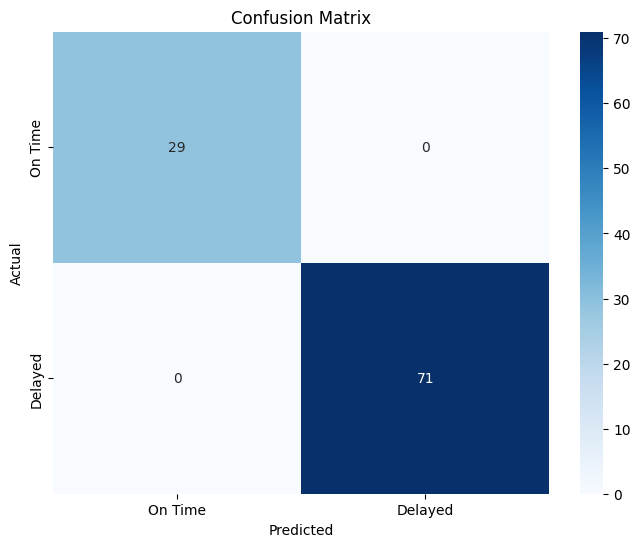


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        71

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [37]:
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(Y_test,y_pred)
conf_matrix = confusion_matrix(Y_test,y_pred)
class_report = classification_report(Y_test,y_pred)

print(f"\nAccuracy: {accuracy}")
print("\nConfusion Matrix:")

#Confusion Matrix
cm = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['On Time', 'Delayed'],
            yticklabels=['On Time', 'Delayed'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("\nClassification Report:")
print(class_report)

Step 8: Heatmap of Feature Correlations

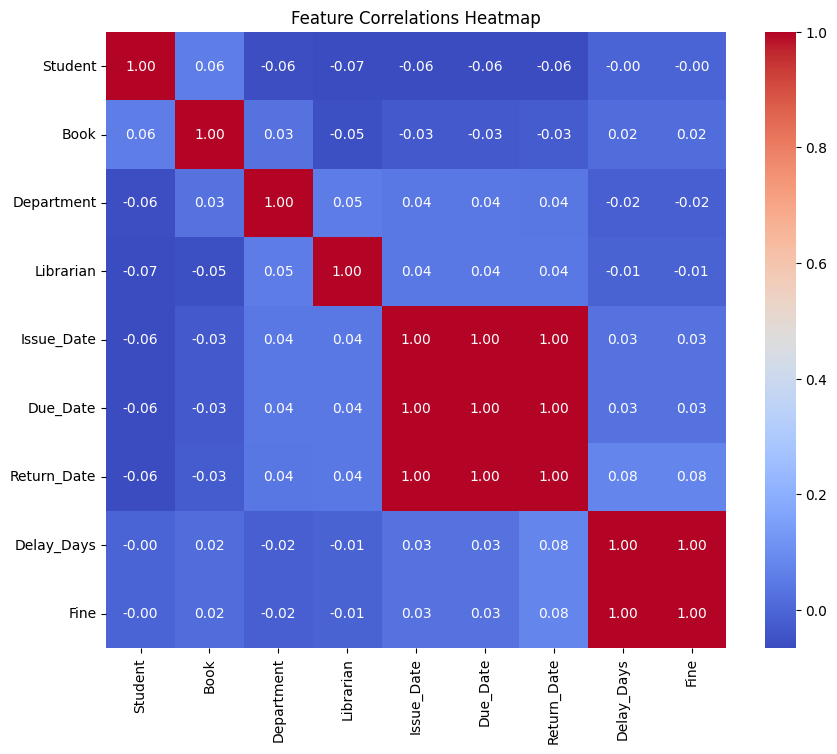

In [36]:
plt.figure(figsize=(10,8))
sns.heatmap(df.drop(columns=['Slip_Id']).corr(),annot=True,cmap='coolwarm',fmt=".2f")
plt.title("Feature Correlations Heatmap")
plt.show()

Step 9: Feature Importance

/tmp/ipython-input-43426083.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance',y='Feature',data=feat_df_rf, palette='viridis')


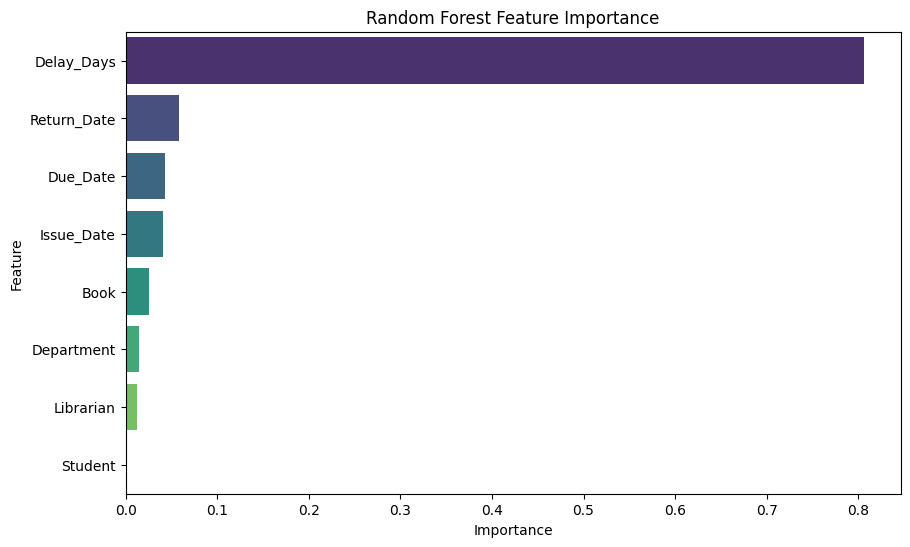

/tmp/ipython-input-43426083.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance',y='Feature',data=feat_df_tree, palette='viridis')


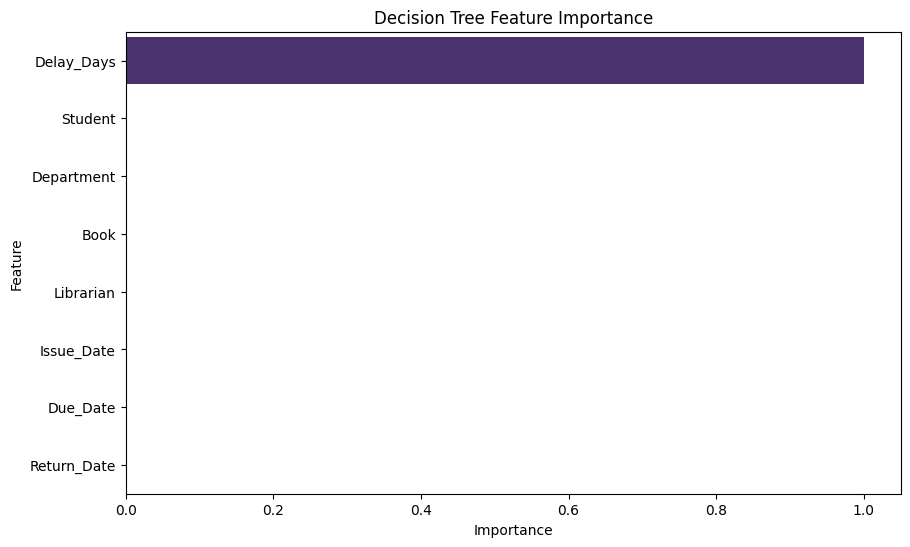

/tmp/ipython-input-43426083.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient',y='Feature',data=feat_df_logreg, palette='viridis')


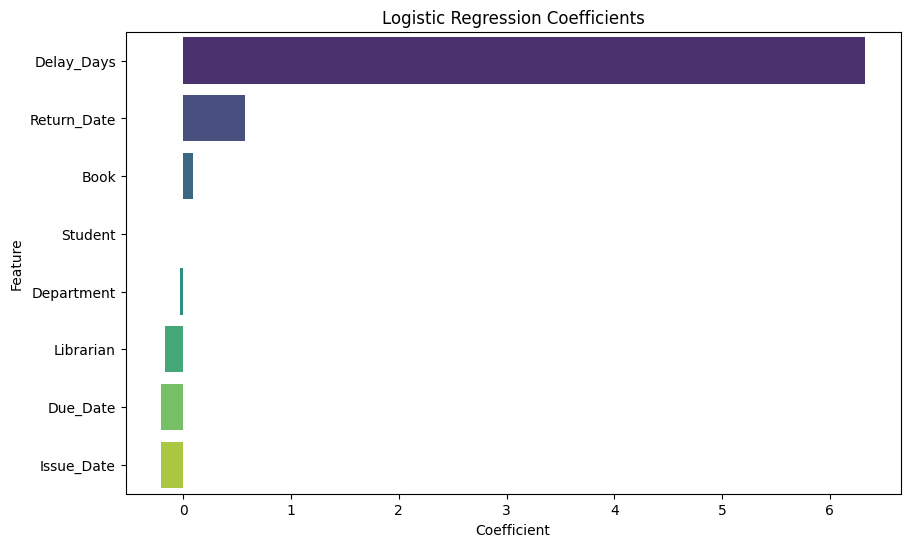


SVM does not have a 'coef_' attribute (likely due to non-linear kernel). Cannot display coefficients directly.


In [41]:
# Feature Importance for Random Forest
importances_rf = rf_model.feature_importances_
feature_names = X.columns
feat_df_rf = pd.DataFrame({'Feature': feature_names, 'Importance': importances_rf})
feat_df_rf = feat_df_rf.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance',y='Feature',data=feat_df_rf, palette='viridis')
plt.title("Random Forest Feature Importance")
plt.show()

# Feature Importance for Decision Tree
importances_tree = tree.feature_importances_
feat_df_tree = pd.DataFrame({'Feature': feature_names, 'Importance': importances_tree})
feat_df_tree = feat_df_tree.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance',y='Feature',data=feat_df_tree, palette='viridis')
plt.title("Decision Tree Feature Importance")
plt.show()


# Coefficients for Logistic Regression
coef_logreg = logreg.coef_[0]
feat_df_logreg = pd.DataFrame({'Feature': feature_names, 'Coefficient': coef_logreg})
feat_df_logreg = feat_df_logreg.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient',y='Feature',data=feat_df_logreg, palette='viridis')
plt.title("Logistic Regression Coefficients")
plt.show()

# Coefficients for SVM (Linear Kernel if used, otherwise more complex)
# Assuming a linear kernel or similar where coef_ is available
if hasattr(svm, 'coef_'):
    coef_svm = svm.coef_[0]
    feat_df_svm = pd.DataFrame({'Feature': feature_names, 'Coefficient': coef_svm})
    feat_df_svm = feat_df_svm.sort_values(by='Coefficient', ascending=False)

    plt.figure(figsize=(10,6))
    sns.barplot(x='Coefficient',y='Feature',data=feat_df_svm, palette='viridis')
    plt.title("SVM Coefficients")
    plt.show()
else:
    print("\nSVM does not have a 'coef_' attribute (likely due to non-linear kernel). Cannot display coefficients directly.")